In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
import sys
sys.path.append("../utils_folder/")
from utils_GD import *

Here we will focus on the stable-tilted-Bernoulli process

In [2]:
# first exercise: 
# Draw N samples from the prior 
# For varying parameters sigma in sigma_ls and fixed tilting

sigma_ls = [.1, .25, .5, .75]
beta, tilting, N = 1, 5, 1000
gd = GD()
num_its = 1000
# cts = np.zeros([len(sigma_ls), num_its, N+1])
# for s, sigma in enumerate(sigma_ls):  
#     print(sigma)
#     for seed in tqdm_notebook(range(num_its)):
#         gd.instantiate_GD(beta, sigma, tilting, N, seed)
#         cts[s, seed] = gd.counts
# np.save('results_rebuttal/cts_0_sigma_varying', cts)
cts = np.load('results/cts_0_sigma_varying.npy', allow_pickle = 1)

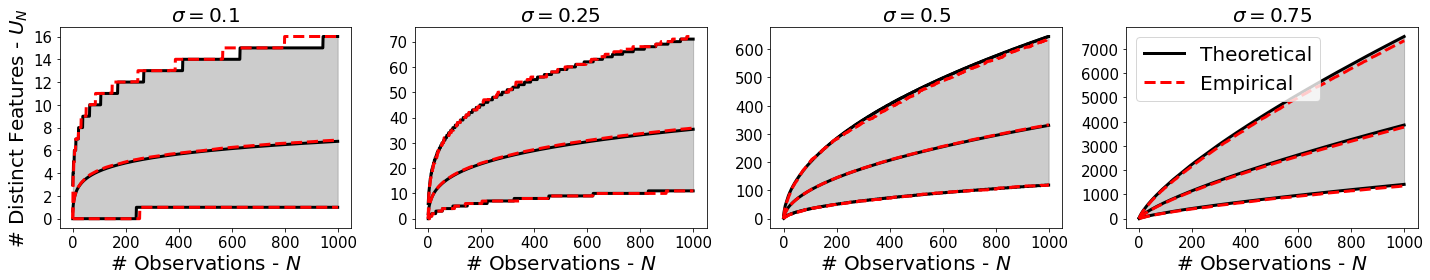

In [3]:
alpha = .95
plt.figure(figsize = (20,4))
for s, sigma in enumerate(sigma_ls):
    plt.subplot(1,len(sigma_ls), s+1)
    
    lo, hi = gd.credible_interval(0,N, 0, (beta,sigma,tilting), alpha)
    emp_lo, emp_hi = np.quantile(cts[s], (1-alpha)/2, axis = 0), np.quantile(cts[s], (1+ alpha)/2, axis = 0)
    emp_mean = np.mean(cts[s], axis  = 0)

    mean = gd.mean(0,N,0,(beta,sigma,tilting))
    N_train = 0

    plt.plot(lo, color = 'k', linewidth  =3)
    plt.plot(hi, color = 'k', linewidth  =3)
    plt.fill_between(np.arange(len(lo)), lo, hi, color = 'k', alpha = .2)
    plt.plot(mean, color = 'k', linewidth  =3, label = 'Theoretical')

    plt.plot(emp_lo, color = 'r', linestyle = '--', linewidth  =3)
    plt.plot(emp_hi, color = 'r', linestyle = '--', linewidth  =3)
    plt.plot(emp_mean, color = 'r', linestyle = '--', label = 'Empirical', linewidth  =3)
    if s == 0:
        plt.ylabel(r'# Distinct Features - $U_N$', fontsize = 20)
    plt.xlabel(r'# Observations - $N$', fontsize = 20)
    plt.title(r'$\sigma = $'+str(sigma), fontsize = 20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize = 15)
plt.legend(fontsize = 20)
# plt.suptitle(r'$c = $'+str(tilting)+', '+str(int(alpha*100))+'% credible intervals', y  =1.05, fontsize = 20)
plt.tight_layout()
plt.savefig('Plots/predictive_sigma.pdf', dpi = 1000, bbox_inches = 'tight')
plt.show()

In [5]:
# first exercise: draw from the prior and compare what you get from the theoretical intervals

tilting_ls = [0, 5, 25, 100]
beta, sigma, N = 1, .2, 1000
gd = GD()
num_its = 1000
# cts = np.zeros([len(tilting_ls), num_its, N+1])
# for t, tilting in enumerate(tilting_ls):  
#     print(sigma)
#     for seed in tqdm_notebook(range(num_its)):
#         gd.instantiate_GD(beta, sigma, tilting, N, seed)
#         cts[t, seed] = gd.counts
# np.save('results_rebuttal/cts_0_tilting_varying', cts)
cts = np.load('results/cts_0_tilting_varying.npy', allow_pickle = 1)

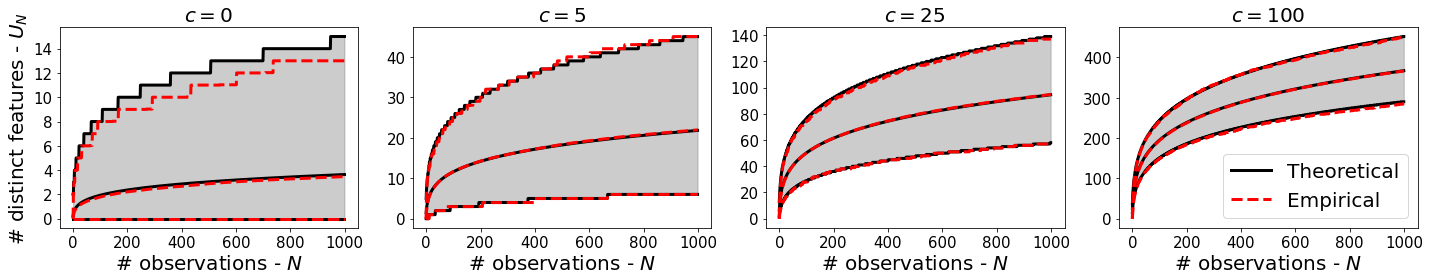

In [7]:

alpha = .95
sigma = .2
plt.figure(figsize = (20,4))
for t, tilting in enumerate(tilting_ls):
    plt.subplot(1,len(tilting_ls), t+1)
    
    lo, hi = gd.credible_interval(0,N, 0, (beta, sigma, tilting), alpha)
    emp_lo, emp_hi = np.quantile(cts[t], (1-alpha)/2, axis = 0), np.quantile(cts[t], (1+ alpha)/2, axis = 0)
    emp_mean = np.mean(cts[t], axis  = 0)

    mean = gd.mean(0,N,0,(beta, sigma, tilting))
    N_train = 0

    plt.plot(lo, color = 'k', linewidth  =3)
    plt.plot(hi, color = 'k', linewidth  =3)
    plt.fill_between(np.arange(len(lo)), lo, hi, color = 'k', alpha = .2)
    plt.plot(mean, color = 'k', linewidth  =3, label = 'Theoretical')

    plt.plot(emp_lo, color = 'r', linestyle = '--', linewidth  =3)
    plt.plot(emp_hi, color = 'r', linestyle = '--', linewidth  =3)
    plt.plot(emp_mean, color = 'r', linestyle = '--', label = 'Empirical', linewidth  =3)
    if t == 0:
        plt.ylabel(r'# distinct features - $U_N$', fontsize = 20)
    plt.xlabel(r'# observations - $N$', fontsize = 20)
    plt.title(r'$c = $'+str(tilting), fontsize = 20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize = 15)
plt.legend(fontsize = 20)
# plt.suptitle(r'$\sigma = $'+str(sigma), y  =1.05, fontsize = 20)
plt.tight_layout()
plt.savefig(r'Plots/predictive_tilting.pdf', dpi = 1000, bbox_inches = 'tight')
plt.show()

In [8]:
# first exercise: draw from the prior and compare what you get from the theoretical intervals

beta_ls = [0.05, 0.5, 1, 1.5]
tilting, sigma = 1, .2
N = 1000
gd = GD()
num_its = 1000
cts = np.zeros([len(beta_ls), num_its, N+1])
# for b, beta in enumerate(beta_ls):  
#     print(beta)
#     for seed in tqdm_notebook(range(num_its)):
#         gd.instantiate_GD(beta, sigma, tilting, N, seed)
#         cts[b, seed] = gd.counts
# np.save('results/cts_0_beta_varying', cts)
cts = np.load('results/cts_0_beta_varying.npy', allow_pickle=1)

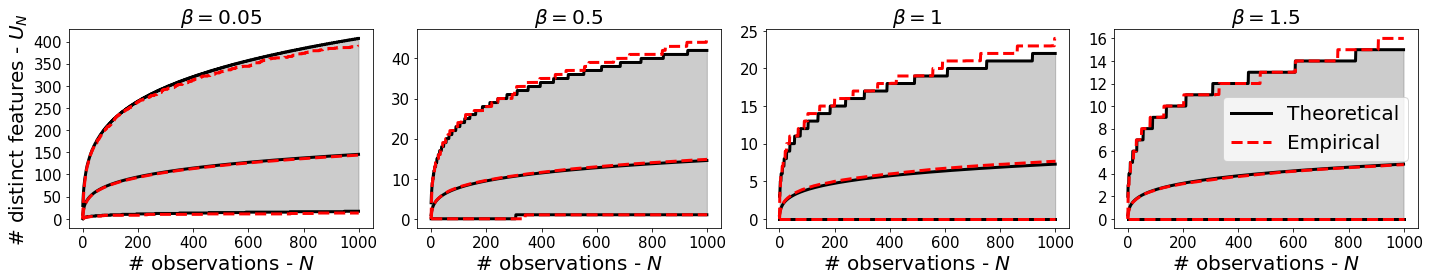

In [9]:
alpha = .95
plt.figure(figsize = (20,4))
for b, beta in enumerate(beta_ls):
    plt.subplot(1,len(beta_ls), b+1)
    
    lo, hi = gd.credible_interval(0, N, 0, (beta, sigma, tilting), alpha)
    emp_lo, emp_hi = np.quantile(cts[b], (1-alpha)/2, axis = 0), np.quantile(cts[b], (1+ alpha)/2, axis = 0)
    emp_mean = np.mean(cts[b], axis  = 0)

    mean = gd.mean(0,N,0,(beta, sigma, tilting))
    N_train = 0

    plt.plot(lo, color = 'k', linewidth  =3)
    plt.plot(hi, color = 'k', linewidth  =3)
    plt.fill_between(np.arange(len(lo)), lo, hi, color = 'k', alpha = .2)
    plt.plot(mean, color = 'k', linewidth  =3, label = 'Theoretical')

    plt.plot(emp_lo, color = 'r', linestyle = '--', linewidth  =3)
    plt.plot(emp_hi, color = 'r', linestyle = '--', linewidth  =3)
    plt.plot(emp_mean, color = 'r', linestyle = '--', label = 'Empirical', linewidth  =3)
    if b == 0:
        plt.ylabel(r'# distinct features - $U_N$', fontsize = 20)
    plt.xlabel(r'# observations - $N$', fontsize = 20)
    plt.title(r'$\beta = $'+str(beta), fontsize = 20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize = 15)
plt.legend(fontsize = 20)
# plt.suptitle(r'$\sigma = $'+str(sigma), y  =1.05, fontsize = 20)
plt.tight_layout()
plt.savefig(r'Plots/predictive_beta.pdf', dpi = 1000, bbox_inches = 'tight')
plt.show()

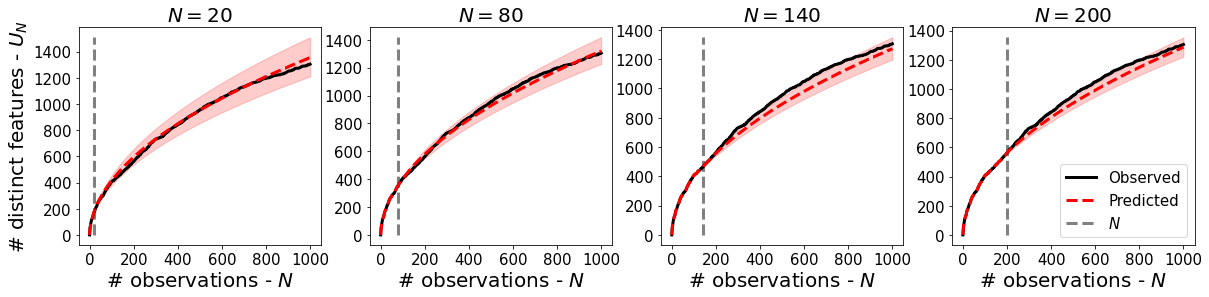

In [10]:
# second exercise : prediction from a fixed number of observations onwards

tilting = 50
sigma = .5
beta = 1
N_train_ls = np.linspace(20, 200, 4, dtype = int)
tilting, N = 20, 1000
gd = GD()
num_its = 1000

gd.instantiate_GD(beta, sigma, tilting, N, 0)
true_counts = gd.counts
predicted_cts_lo = np.zeros([len(N_train_ls), len(true_counts)])
predicted_cts_hi = np.zeros([len(N_train_ls), len(true_counts)])
predicted_cts_med = np.zeros([len(N_train_ls), len(true_counts)])

for n, N_train in enumerate(N_train_ls):
    predicted_cts_lo[n, :N_train+1], predicted_cts_hi[n, :N_train+1], predicted_cts_med[n, :N_train+1] = true_counts[:N_train+1], true_counts[:N_train+1], true_counts[:N_train+1]
    predicted_cts_lo[n, N_train+1:], predicted_cts_hi[n, N_train+1:] = true_counts[N_train+1] + gd.credible_interval(N_train, N-N_train, true_counts[N_train+1], (beta, sigma, tilting), .9)
    predicted_cts_med[n, N_train+1:] = true_counts[N_train+1]+ gd.median(N_train, N-N_train, true_counts[N_train+1], (beta, sigma, tilting))
    
plt.figure(figsize = (20,4))
for n, N_train in enumerate(N_train_ls):
    plt.subplot(1, len(N_train_ls), n+1)
    plt.plot(true_counts, color = 'k', linewidth  =3, label = 'Observed')
    plt.plot(predicted_cts_med[n], color = 'r', linestyle = '--', linewidth  =3, label = 'Predicted')
    plt.fill_between(np.arange(len(predicted_cts_lo[0])), predicted_cts_lo[n], predicted_cts_hi[n], color = 'r', alpha = .2)
    plt.vlines(x = N_train, ymin = 0, ymax = predicted_cts_hi[n, -1], color = 'gray', linestyle = '--', linewidth = 3, label = r'$N$')
    plt.title(r'$N = $'+str(N_train), fontsize = 20)
    if n == 0:
        plt.ylabel(r'# distinct features - $U_N$', fontsize = 20)
    plt.xlabel(r'# observations - $N$', fontsize = 20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)   
# plt.suptitle(r'$\sigma=$'+str(sigma)+', $c = $'+str(tilting), y = 1.05, fontsize = 20)
plt.savefig('Plots/predictive_2.pdf', dpi = 1000, bbox_inches = 'tight')
plt.show()

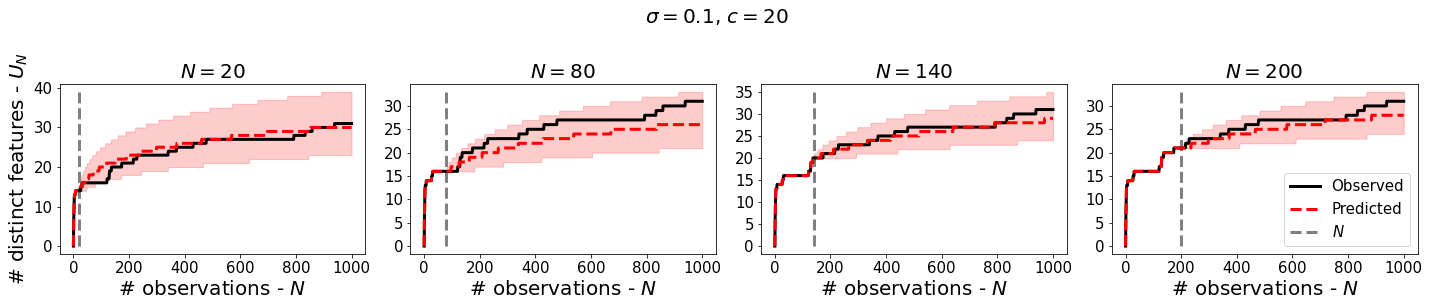

In [11]:
# second exercise : prediction from a fixed number of observations onwards

tilting = 2000
sigma = .1
N_train_ls = np.linspace(20, 200, 4, dtype = int)
tilting, N = 20, 1000
gd = GD()
num_its = 100

gd.instantiate_GD(beta, sigma, tilting, N, 0)
true_counts = gd.counts
predicted_cts_lo = np.zeros([len(N_train_ls), len(true_counts)])
predicted_cts_hi = np.zeros([len(N_train_ls), len(true_counts)])
predicted_cts_med = np.zeros([len(N_train_ls), len(true_counts)])

for n, N_train in enumerate(N_train_ls):
    predicted_cts_lo[n, :N_train+1], predicted_cts_hi[n, :N_train+1], predicted_cts_med[n, :N_train+1] = true_counts[:N_train+1], true_counts[:N_train+1], true_counts[:N_train+1]
    predicted_cts_lo[n, N_train+1:], predicted_cts_hi[n, N_train+1:] = true_counts[N_train+1] + gd.credible_interval(N_train, N-N_train, true_counts[N_train+1], (beta, sigma, tilting), .9)
    predicted_cts_med[n, N_train+1:] = true_counts[N_train+1]+ gd.median(N_train, N-N_train, true_counts[N_train+1], (beta, sigma, tilting))
    
plt.figure(figsize = (20,4))
for n, N_train in enumerate(N_train_ls):
    plt.subplot(1, len(N_train_ls), n+1)
    plt.plot(true_counts, color = 'k', linewidth  =3, label = 'Observed')
    plt.plot(predicted_cts_med[n], color = 'r', linestyle = '--', linewidth  =3, label = 'Predicted')
    plt.fill_between(np.arange(len(predicted_cts_lo[0])), predicted_cts_lo[n], predicted_cts_hi[n], color = 'r', alpha = .2)
    plt.vlines(x = N_train, ymin = 0, ymax = predicted_cts_hi[n, -1], color = 'gray', linestyle = '--', linewidth = 3, label = r'$N$')
    plt.title(r'$N = $'+str(N_train), fontsize = 20)
    if n == 0:
        plt.ylabel(r'# distinct features - $U_N$', fontsize = 20)
    plt.xlabel(r'# observations - $N$', fontsize = 20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)   
plt.suptitle(r'$\sigma=$'+str(sigma)+', $c = $'+str(tilting), y = 1.05, fontsize = 20)
plt.tight_layout()
plt.savefig('Plots/predictive_3.pdf', dpi = 1000, bbox_inches = 'tight')
plt.show()

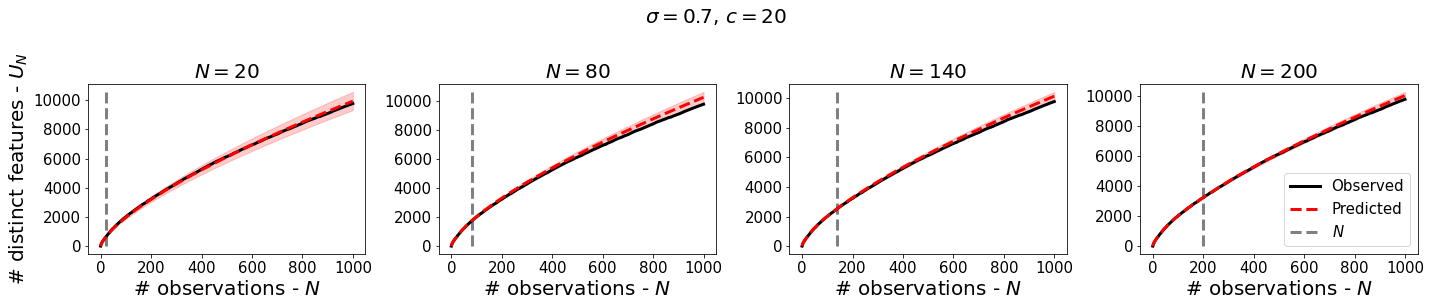

In [12]:
# second exercise : prediction from a fixed number of observations onwards

tilting = 100000
sigma = .7
N_train_ls = np.linspace(20, 200, 4, dtype = int)
tilting, N = 20, 1000
gd = GD()
num_its = 100

gd.instantiate_GD(beta, sigma, tilting, N, 0)
true_counts = gd.counts
predicted_cts_lo = np.zeros([len(N_train_ls), len(true_counts)])
predicted_cts_hi = np.zeros([len(N_train_ls), len(true_counts)])
predicted_cts_med = np.zeros([len(N_train_ls), len(true_counts)])

for n, N_train in enumerate(N_train_ls):
    predicted_cts_lo[n, :N_train+1], predicted_cts_hi[n, :N_train+1], predicted_cts_med[n, :N_train+1] = true_counts[:N_train+1], true_counts[:N_train+1], true_counts[:N_train+1]
    predicted_cts_lo[n, N_train+1:], predicted_cts_hi[n, N_train+1:] = true_counts[N_train+1] + gd.credible_interval(N_train, N-N_train, true_counts[N_train+1], (beta, sigma, tilting), .9)
    predicted_cts_med[n, N_train+1:] = true_counts[N_train+1]+ gd.median(N_train, N-N_train, true_counts[N_train+1], (beta, sigma, tilting))
    
plt.figure(figsize = (20,4))
for n, N_train in enumerate(N_train_ls):
    plt.subplot(1, len(N_train_ls), n+1)
    plt.plot(true_counts, color = 'k', linewidth  =3, label = 'Observed')
    plt.plot(predicted_cts_med[n], color = 'r', linestyle = '--', linewidth  =3, label = 'Predicted')
    plt.fill_between(np.arange(len(predicted_cts_lo[0])), predicted_cts_lo[n], predicted_cts_hi[n], color = 'r', alpha = .2)
    plt.vlines(x = N_train, ymin = 0, ymax = predicted_cts_hi[n, -1], color = 'gray', linestyle = '--', linewidth = 3, label = r'$N$')
    plt.title(r'$N = $'+str(N_train), fontsize = 20)
    if n == 0:
        plt.ylabel(r'# distinct features - $U_N$', fontsize = 20)
    plt.xlabel(r'# observations - $N$', fontsize = 20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)   
plt.suptitle(r'$\sigma=$'+str(sigma)+', $c = $'+str(tilting), y = 1.05, fontsize = 20)
plt.tight_layout()
plt.savefig('Plots/predictive_4.pdf', dpi = 1000, bbox_inches = 'tight')
plt.show()

In [ ]:
# # now the next exercise is to LEARN the parameters from the feature allocation using the efpf

# # second exercise : prediction from a fixed number of observations onwards

# tilting = 10
# sigma = .5
# beta = 1

# N_train = 100
# N = 2000
# gd = GD()
# gd.instantiate_GD(beta, sigma, tilting, N_train, 0)
# opt_p = gd.fit_EFPF(gd.sfs, N_train, num_its=5, status = True)
# gd.instantiate_GD(beta, sigma, tilting, N, 0)

# plt.figure()
# plt.plot(gd.counts, color = 'k', linewidth  =3)

# predicted_cts_lo, predicted_cts_hi, predicted_cts_med = np.zeros([len(gd.counts)]), np.zeros([len(gd.counts)]), np.zeros([len(gd.counts)])
# predicted_cts_lo[:N_train+1], predicted_cts_hi[:N_train+1], predicted_cts_med[:N_train+1] = gd.counts[:N_train+1], gd.counts[:N_train+1], gd.counts[:N_train+1]
# predicted_cts_med[N_train+1:] = gd.counts[N_train+1]+gd.median(N_train, N-N_train, gd.counts[N_train+1], opt_p)
# predicted_cts_lo[N_train+1:], predicted_cts_hi[N_train+1:] = gd.counts[N_train+1]+gd.credible_interval(N_train, N-N_train, gd.counts[N_train+1], opt_p, .95)

# plt.plot(predicted_cts_med, color = 'r', linestyle = '--')
# plt.fill_between(np.arange(len(predicted_cts_lo)), predicted_cts_lo, predicted_cts_hi, color = 'r', alpha = .2)
# plt.vlines(x = N_train, ymin = 0, ymax = predicted_cts_hi[-1], linestyle = '--', color = 'gray', linewidth = 3, label = r'$N$')
# plt.xticks(fontsize=15)
# plt.yticks(fontsize = 15)
# plt.tight_layout()
# plt.show()

In [ ]:
# # now the next exercise is to LEARN the parameters from the feature allocation using the efpf

# tilting = 10
# sigma = .5
# beta = 1
# N_train_ls = np.linspace(30, 300, 4, dtype = int)
# N = 5000
# gd = GD()
# opt_p = []
# for N_train in N_train_ls:
#     gd.instantiate_GD(beta, sigma, tilting, N_train, 0)
#     opt_p.append(gd.fit_EFPF(gd.sfs, N_train, num_its=5, status = True))
    
# gd.instantiate_GD(beta, sigma, tilting, N, 0)


# plt.figure(figsize = (20, 4))
# for n, N_train in enumerate(N_train_ls):
#     plt.subplot(1, len(N_train_ls), n+1)
#     plt.plot(gd.counts, color = 'k', linewidth  =3)

#     predicted_cts_lo, predicted_cts_hi, predicted_cts_med = np.zeros([len(gd.counts)]), np.zeros([len(gd.counts)]), np.zeros([len(gd.counts)])
#     predicted_cts_lo[:N_train+1], predicted_cts_hi[:N_train+1], predicted_cts_med[:N_train+1] = gd.counts[:N_train+1], gd.counts[:N_train+1], gd.counts[:N_train+1]
#     predicted_cts_med[N_train+1:] = gd.counts[N_train+1]+gd.median(N_train, N-N_train, gd.counts[N_train+1], opt_p[n])
#     predicted_cts_lo[N_train+1:], predicted_cts_hi[N_train+1:] = gd.counts[N_train+1]+gd.credible_interval(N_train, N-N_train, gd.counts[N_train+1], opt_p[n], .95)

#     plt.plot(predicted_cts_med, color = 'r', linestyle = '--')
#     plt.fill_between(np.arange(len(predicted_cts_lo)), predicted_cts_lo, predicted_cts_hi, color = 'r', alpha = .2)
#     plt.vlines(x = N_train, ymin = 0, ymax = predicted_cts_hi[-1], linestyle = '--', color = 'gray', linewidth = 3, label = r'$N$')
#     plt.xticks(fontsize=15)
#     plt.yticks(fontsize = 15)
#     plt.title(r'$N = $'+str(N_train), fontsize = 20)
# plt.tight_layout()
# plt.show()

In [ ]:
# # now the next exercise is to LEARN the parameters from the feature allocation using the efpf

# tilting = 100
# beta =  1
# sigma = .7
# N_train_ls = np.linspace(30, 300, 4, dtype = int)
# N = 5000
# gd = GD()
# opt_p = []
# for N_train in N_train_ls:
#     gd.instantiate_GD(beta, sigma, tilting, N_train, 0)
#     opt_p.append(gd.fit_EFPF(gd.sfs, N_train, num_its=5, status = True))
    
# gd.instantiate_GD(beta, sigma, tilting, N, 0)


# plt.figure(figsize = (20, 4))
# for n, N_train in enumerate(N_train_ls):
#     plt.subplot(1, len(N_train_ls), n+1)
#     plt.plot(gd.counts, color = 'k', linewidth  =3)

#     predicted_cts_lo, predicted_cts_hi, predicted_cts_med = np.zeros([len(gd.counts)]), np.zeros([len(gd.counts)]), np.zeros([len(gd.counts)])
#     predicted_cts_lo[:N_train+1], predicted_cts_hi[:N_train+1], predicted_cts_med[:N_train+1] = gd.counts[:N_train+1], gd.counts[:N_train+1], gd.counts[:N_train+1]
#     predicted_cts_med[N_train+1:] = gd.counts[N_train+1]+gd.median(N_train, N-N_train, gd.counts[N_train+1], opt_p[n])
#     predicted_cts_lo[N_train+1:], predicted_cts_hi[N_train+1:] = gd.counts[N_train+1]+gd.credible_interval(N_train, N-N_train, gd.counts[N_train+1], opt_p[n], .95)

#     plt.plot(predicted_cts_med, color = 'r', linestyle = '--')
#     plt.fill_between(np.arange(len(predicted_cts_lo)), predicted_cts_lo, predicted_cts_hi, color = 'r', alpha = .2)
#     plt.vlines(x = N_train, ymin = 0, ymax = predicted_cts_hi[-1], linestyle = '--', color = 'gray', linewidth = 3, label = r'$N$')
#     plt.xticks(fontsize=15)
#     plt.yticks(fontsize = 15)
#     plt.title(r'$N = $'+str(N_train), fontsize = 20)
# plt.tight_layout()
# plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

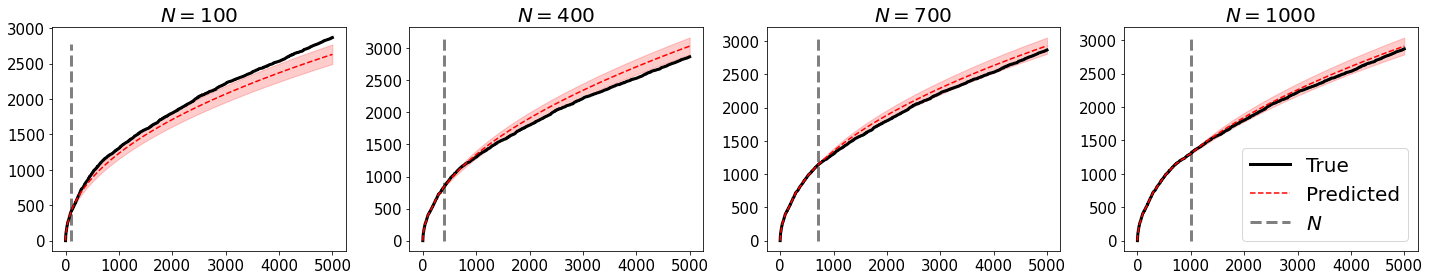

In [14]:
# now the next exercise is to LEARN the parameters from the feature allocation using the efpf

tilting = 20
beta =  1
sigma = .5
N_train_ls = [100,400,700,1000]
N = 5000
gd = GD()
opt_p = []
for N_train in N_train_ls:
    gd.instantiate_GD(beta, sigma, tilting, N_train, 0)
    opt_p.append(gd.fit_EFPF(gd.sfs, N_train, num_its=5, status = True))
    
gd.instantiate_GD(beta, sigma, tilting, N, 0)


plt.figure(figsize = (20, 4))
for n, N_train in enumerate(N_train_ls):
    plt.subplot(1, len(N_train_ls), n+1)
    plt.plot(gd.counts, color = 'k', linewidth  =3, label = 'True')

    predicted_cts_lo, predicted_cts_hi, predicted_cts_med = np.zeros([len(gd.counts)]), np.zeros([len(gd.counts)]), np.zeros([len(gd.counts)])
    predicted_cts_lo[:N_train+1], predicted_cts_hi[:N_train+1], predicted_cts_med[:N_train+1] = gd.counts[:N_train+1], gd.counts[:N_train+1], gd.counts[:N_train+1]
    predicted_cts_med[N_train+1:] = gd.counts[N_train+1]+gd.median(N_train, N-N_train, gd.counts[N_train+1], opt_p[n])
    predicted_cts_lo[N_train+1:], predicted_cts_hi[N_train+1:] = gd.counts[N_train+1]+gd.credible_interval(N_train, N-N_train, gd.counts[N_train+1], opt_p[n], .99)

    plt.plot(predicted_cts_med, color = 'r', linestyle = '--', label = 'Predicted')
    plt.fill_between(np.arange(len(predicted_cts_lo)), predicted_cts_lo, predicted_cts_hi, color = 'r', alpha = .2)
    plt.vlines(x = N_train, ymin = 0, ymax = predicted_cts_hi[-1], linestyle = '--', color = 'gray', linewidth = 3, label = r'$N$')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize = 15)
    plt.title(r'$N = $'+str(N_train), fontsize = 20)
    
    if n == len(N_train_ls)-1:
        plt.legend(fontsize = 20)
plt.tight_layout()
plt.savefig('Plots/predicted_learned.pdf', bbox_inches = 'tight', dpi = 1000)
plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

../utils_folder/utils_GD.py:237: RuntimeWarning: divide by zero encountered in log
  cost = K*np.log(sigma) - (K+tilting+1) * np.log(beta+sigma*spb(1-sigma, np.arange(1,N+1)).sum())  + gln(K+tilting+1) - gln(tilting+1) + (tilting+1)*np.log(beta) + np.inner(sfs,bln(np.arange(1,len(sfs)+1)-sigma, N - np.arange(1,len(sfs)+1) + 1))
/Users/lorenzomasoero/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

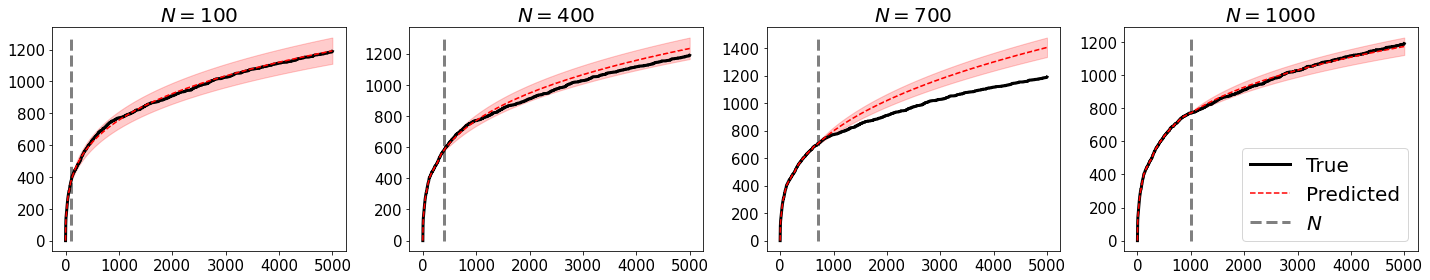

In [16]:
# now the next exercise is to LEARN the parameters from the feature allocation using the efpf

tilting = 100
beta =  .8
sigma = .25
N_train_ls = [100,400,700,1000]
N = 5000
gd = GD()
opt_p = []
for N_train in N_train_ls:
    gd.instantiate_GD(beta, sigma, tilting, N_train, 0)
    opt_p.append(gd.fit_EFPF(gd.sfs, N_train, num_its=5, status = True))
    
gd.instantiate_GD(beta, sigma, tilting, N, 0)


plt.figure(figsize = (20, 4))
for n, N_train in enumerate(N_train_ls):
    plt.subplot(1, len(N_train_ls), n+1)
    plt.plot(gd.counts, color = 'k', linewidth  =3, label = 'True')

    predicted_cts_lo, predicted_cts_hi, predicted_cts_med = np.zeros([len(gd.counts)]), np.zeros([len(gd.counts)]), np.zeros([len(gd.counts)])
    predicted_cts_lo[:N_train+1], predicted_cts_hi[:N_train+1], predicted_cts_med[:N_train+1] = gd.counts[:N_train+1], gd.counts[:N_train+1], gd.counts[:N_train+1]
    predicted_cts_med[N_train+1:] = gd.counts[N_train+1]+gd.median(N_train, N-N_train, gd.counts[N_train+1], opt_p[n])
    predicted_cts_lo[N_train+1:], predicted_cts_hi[N_train+1:] = gd.counts[N_train+1]+gd.credible_interval(N_train, N-N_train, gd.counts[N_train+1], opt_p[n], .99)

    plt.plot(predicted_cts_med, color = 'r', linestyle = '--', label = 'Predicted')
    plt.fill_between(np.arange(len(predicted_cts_lo)), predicted_cts_lo, predicted_cts_hi, color = 'r', alpha = .2)
    plt.vlines(x = N_train, ymin = 0, ymax = predicted_cts_hi[-1], linestyle = '--', color = 'gray', linewidth = 3, label = r'$N$')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize = 15)
    plt.title(r'$N = $'+str(N_train), fontsize = 20)
    
    if n == len(N_train_ls)-1:
        plt.legend(fontsize = 20)
plt.tight_layout()
plt.savefig('Plots/predicted_learned_2.pdf', bbox_inches = 'tight', dpi = 1000)
plt.show()

In [ ]:
# accuracy of the procedure

beta_ls = np.linspace(.1, 10, 3)
sigma_ls = np.linspace(.2, .8, 3) 
tilting_ls = np.linspace(.1, 50, 3)
# N_train_ls = np.linspace(20, 200, 3, dtype = int)
N_train = 100
N_MC = 100
num_its = 5

In [ ]:
# estimates_array = np.zeros([len(beta_ls), len(sigma_ls), len(tilting_ls), N_MC, 3])
# accuracy_dict = {}
# for b, beta in enumerate(beta_ls):
#     print('beta = ', beta)
#     for s, sigma in enumerate(sigma_ls):
#         print('\tsigma = ', sigma)
#         for t, tilting in enumerate(tilting_ls):
#             print('\t\ttilting = ', tilting)
#             accuracy_dict['beta_'+str(beta)+'_sigma_'+str(sigma)+'_tilting_'+str(tilting)] = np.zeros([N_MC, 3])

#             for seed in tqdm_notebook(range(N_MC)):

#                 gd.instantiate_GD(beta, sigma, tilting, N_train, seed = seed)
#                 opt_p = gd.fit_EFPF(gd.sfs, N_train, num_its=num_its, status = False)
#                 accuracy_dict['beta_'+str(beta)+'_sigma_'+str(sigma)+'_tilting_'+str(tilting)][seed] = opt_p
#                 estimates_array[b, s, t, seed] = opt_p
#             print('\t\t\t\tDone!')
# np.save('results_rebuttal/estimates_array', estimates_array)
# np.save('results_rebuttal/accuracy_dict', accuracy_dict)

In [17]:
beta, sigma, tilting = 5, .2, 3
params = beta, sigma, tilting
N_train = 10000
num_its = 10
seed = 0
gd = GD()
gd.instantiate_GD(beta, sigma, tilting, N_train, seed = seed)
opt_p = gd.fit_EFPF(gd.sfs, N_train, num_its=num_its, bnds=((.01, 10),(.001, .999), (1,10)), status = False)
efpf = gd.make_EFPF(gd.sfs, gd.N)

beta_range = np.linspace(.01,10,100)
sigma_range = np.linspace(.01,.99,1000)
tilting_range = np.linspace(.05, 20, 200)

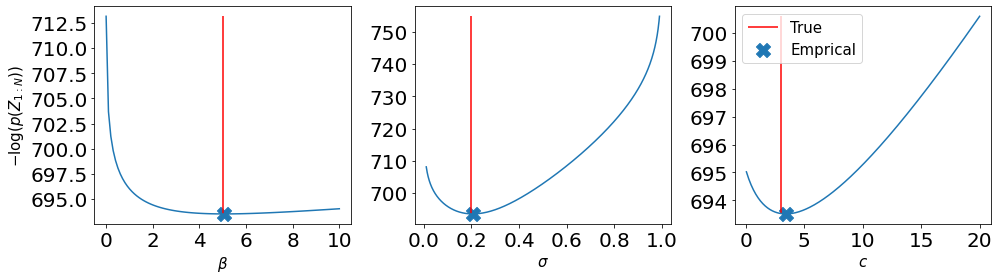

In [18]:
plt.figure(figsize = (14,4))
plt.subplot(131)
valz = [efpf((b,sigma,tilting)) for b in beta_range]
plt.plot(beta_range, valz)
plt.scatter(beta_range[np.argmin(valz)], min(valz), marker = 'X', s = 200)
plt.vlines(x = beta, ymin = min(valz), ymax=max(valz), color = 'red')
plt.xlabel(r'$\beta$', fontsize = 15)
plt.ylabel(r'$-\log \left(p(Z_{1:N})\right)$', fontsize = 15)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.subplot(132)
valz = [efpf((beta,s,tilting)) for s in sigma_range]
plt.plot(sigma_range,valz)
plt.vlines(x = sigma, ymin = min(valz), ymax=max(valz), color = 'red')
plt.scatter(sigma_range[np.argmin(valz)], min(valz), marker = 'X', s = 200)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel(r'$\sigma$', fontsize = 15)
plt.subplot(133)
valz = [efpf((beta,sigma,t)) for t in tilting_range]
plt.plot(tilting_range, valz)
plt.vlines(x = tilting, ymin = min(valz), ymax=max(valz), color = 'red', label = 'True')
plt.scatter(tilting_range[np.argmin(valz)], min(valz), marker = 'X', s = 200, label = 'Emprical')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel('$c$', fontsize = 15)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.savefig('Plots/marginal_like_1.pdf', bbox_inches = 'tight', dpi=1000)

In [19]:
beta, sigma, tilting = 10, .7, 20
params = beta, sigma, tilting
N_train = 1000
num_its = 10
seed = 0
gd = GD()
gd.instantiate_GD(beta, sigma, tilting, N_train, seed = seed)
opt_p = gd.fit_EFPF(gd.sfs, N_train, num_its=num_its, bnds=((.01, 10),(.001, .999), (1,10)), status = False)
efpf = gd.make_EFPF(gd.sfs, gd.N)

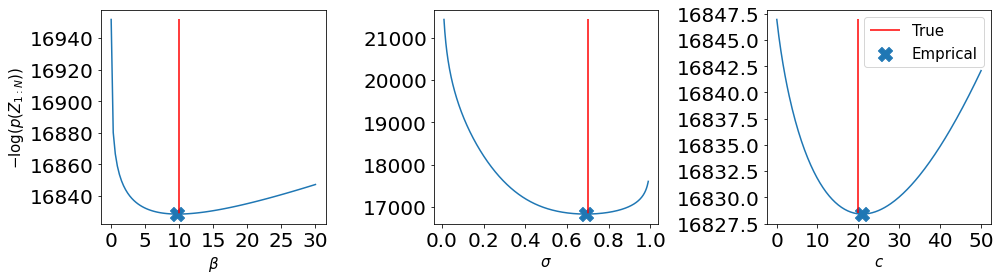

In [20]:
beta_range = np.linspace(.01,30,100)
sigma_range = np.linspace(.01,.99,1000)
tilting_range = np.linspace(.05, 50, 200)
plt.figure(figsize = (14,4))
plt.subplot(131)
plt.ylabel(r'$-\log \left(p(Z_{1:N})\right)$', fontsize = 15)
valz = [efpf((b,sigma,tilting)) for b in beta_range]
plt.plot(beta_range, valz)
plt.scatter(beta_range[np.argmin(valz)], min(valz), marker = 'X', s = 200)
plt.vlines(x = beta, ymin = min(valz), ymax=max(valz), color = 'red')
plt.xlabel(r'$\beta$', fontsize = 15)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.subplot(132)
valz = [efpf((beta,s,tilting)) for s in sigma_range]
plt.plot(sigma_range,valz)
plt.vlines(x = sigma, ymin = min(valz), ymax=max(valz), color = 'red')
plt.scatter(sigma_range[np.argmin(valz)], min(valz), marker = 'X', s = 200)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel(r'$\sigma$', fontsize = 15)
plt.subplot(133)
valz = [efpf((beta,sigma,t)) for t in tilting_range]
plt.plot(tilting_range, valz)
plt.vlines(x = tilting, ymin = min(valz), ymax=max(valz), color = 'red', label = 'True')
plt.scatter(tilting_range[np.argmin(valz)], min(valz), marker = 'X', s = 200, label = 'Emprical')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel('$c$', fontsize = 15)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.savefig('Plots/marginal_like_2.pdf', bbox_inches = 'tight', dpi=1000)
plt.show()

In [21]:
beta, sigma, tilting = 5, .35, 102
params = beta, sigma, tilting
N_train = 100
num_its = 10
seed = 0
gd = GD()
gd.instantiate_GD(beta, sigma, tilting, N_train, seed = seed)
opt_p = gd.fit_EFPF(gd.sfs, N_train, num_its=num_its, bnds=((.01, 10),(.001, .999), (1,10)), status = False)
efpf = gd.make_EFPF(gd.sfs, gd.N)

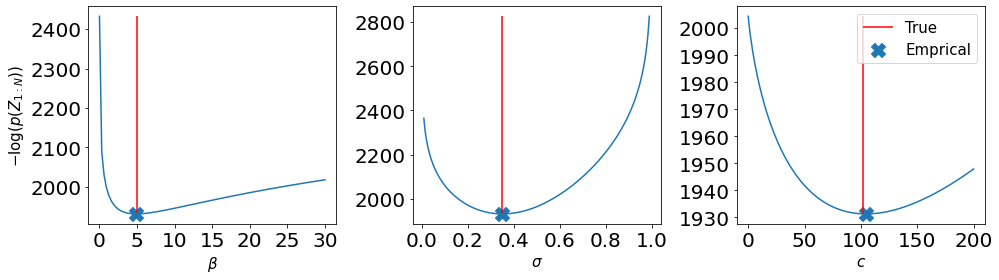

In [22]:
beta_range = np.linspace(.01,30,100)
sigma_range = np.linspace(.01,.99,1000)
tilting_range = np.linspace(.05, 200, 200)
plt.figure(figsize = (14,4))
plt.subplot(131)
plt.ylabel(r'$-\log \left(p(Z_{1:N})\right)$', fontsize = 15)
valz = [efpf((b,sigma,tilting)) for b in beta_range]
plt.plot(beta_range, valz)
plt.scatter(beta_range[np.argmin(valz)], min(valz), marker = 'X', s = 200)
plt.vlines(x = beta, ymin = min(valz), ymax=max(valz), color = 'red')
plt.xlabel(r'$\beta$', fontsize = 15)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.subplot(132)
valz = [efpf((beta,s,tilting)) for s in sigma_range]
plt.plot(sigma_range,valz)
plt.vlines(x = sigma, ymin = min(valz), ymax=max(valz), color = 'red')
plt.scatter(sigma_range[np.argmin(valz)], min(valz), marker = 'X', s = 200)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel(r'$\sigma$', fontsize = 15)
plt.subplot(133)
valz = [efpf((beta,sigma,t)) for t in tilting_range]
plt.plot(tilting_range, valz)
plt.vlines(x = tilting, ymin = min(valz), ymax=max(valz), color = 'red', label = 'True')
plt.scatter(tilting_range[np.argmin(valz)], min(valz), marker = 'X', s = 200, label = 'Emprical')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel('$c$', fontsize = 15)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.savefig('Plots/marginal_like_3.pdf', bbox_inches = 'tight', dpi=1000)
plt.show()